# Density estimation demo

Here we demonstrate how to use the ``inference.pdf_tools`` module for estimating univariate probability density functions from sample data.

In [1]:
from numpy import linspace, zeros, exp, log, sqrt, pi
from numpy.random import normal
import matplotlib.pyplot as plt

## Kernel-density estimation

Gaussian kernel-density estimation is implemented via the `GaussianKDE` class:

In [2]:
# generate some sample data to use as a test-case
N = 150000
sample = zeros(N)
sample[:N//3] = normal(size=N//3)*0.5 + 1.8
sample[N//3:] = normal(size=2*(N//3))*0.5 + 3.5

In [3]:
# GaussianKDE takes an array of sample values as its only argument
from inference.pdf_tools import GaussianKDE
pdf = GaussianKDE(sample)

Instances of density estimator classes like `GaussianKDE` can be called as functions to return the estimate of the PDF at given spatial points:

In [4]:
x = linspace(0, 6, 1000) # make an axis on which to evaluate the PDF estimate
p = pdf(x) # call the instance to get the estimate

We could plot the estimate manually, but for convenience the `plot_summary()` method will generate a plot automatically as well as summary statistics:

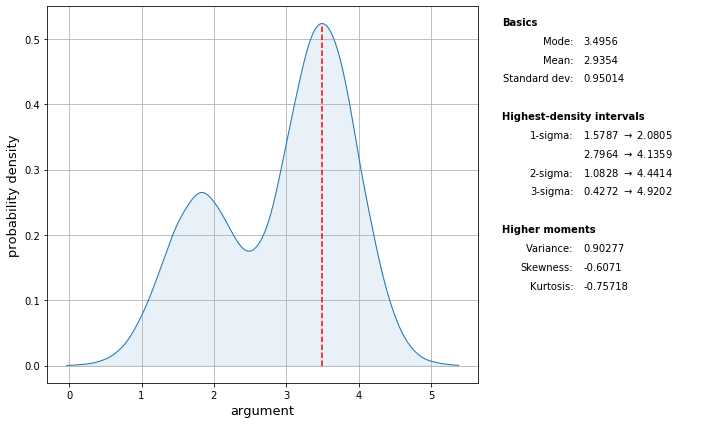

In [5]:
pdf.plot_summary()

The summary statistics can be accessed via properties or methods:

In [6]:
# the location of the mode is a property
mode = pdf.mode

# The highest-density interval for any fraction of total probability can is returned by the interval() method
hdi_95 = pdf.interval(frac = 0.95)

# the mean, variance, skewness and excess kurtosis are returned by the moments() method:
mean, variance, skewness, kurtosis = pdf.moments()

By default, `GaussianKDE` uses a simple but easy to compute estimate of the bandwidth (the standard deviation of each Gaussian kernel).
However, when estimating strongly non-normal distributions, this simple approach will over-estimate required bandwidth.

In these cases, the cross-validation bandwidth selector can be used to obtain better results, but with higher computational cost.

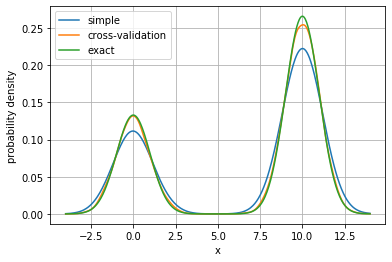

In [7]:
# to demonstrate, lets create a new sample:
N = 30000
sample = zeros(N)
sample[:N//3] = normal(size=N//3)
sample[N//3:] = normal(size=2*(N//3)) + 10

# now construct estimators using the simple and cross-validation estimators
pdf_simple = GaussianKDE(sample)
pdf_crossval = GaussianKDE(sample, cross_validation = True)

# now build an axis on which to evaluate the estimates
x = linspace(-4,14,500)

# for comparison also compute the real distribution
exact = (exp(-0.5*x**2)/3 + 2*exp(-0.5*(x-10)**2)/3)/sqrt(2*pi)

# plot everything together
plt.plot(x, pdf_simple(x), label = 'simple')
plt.plot(x, pdf_crossval(x), label = 'cross-validation')
plt.plot(x, exact, label = 'exact')
plt.ylabel('probability density')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

## Functional density estimation for unimodal PDFs

The `UnimodalPdf` class...

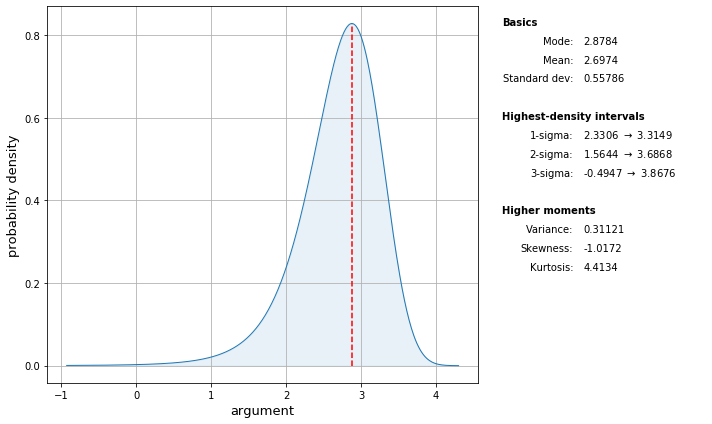

In [8]:
# first create a sample from a skewed distribution.
sample = log((normal(size = 25000)+4)**2)

# create an instance of the density estimator
from inference.pdf_tools import UnimodalPdf
pdf = UnimodalPdf(sample)

# All the methods that worked on...
pdf.plot_summary()